In [24]:
import torch
import torchvision
import torchvision.transforms as transforms

In [25]:
from torchvision import datasets, transforms
import torchvision
import torchvision.transforms as transforms
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)), ])
print(transform)

Compose(
    ToTensor()
    Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
)


In [26]:
trainset = datasets.CIFAR10('CIFAR10_data/', download = True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)

Files already downloaded and verified


In [27]:
#a subset of the 80 million tiny images dataset and consists of 60,000 32x32 color images 
#containing one of 10 object classes, with 6000 images per class.

print(len(trainset))
indexs = list(range(len(trainset)))
#print(len(indexs))
print(indexs[0:2])

50000
[0, 1]


In [28]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 3, 32, 32])
torch.Size([64])


In [29]:
print(images[0].shape)

torch.Size([3, 32, 32])


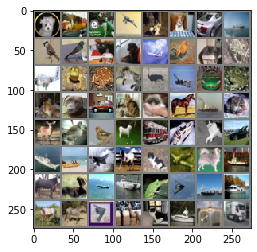

  dog plane   dog plane


In [30]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels



classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [46]:
from torch import nn, optim
import torch.nn.functional as F

#having 10 classes
#32x32 pixels
#

In [69]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(3072, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 10)
        
    def forward(self,x):
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.log_softmax(self.fc5(x), dim = 1)
        return x
    
model = Model()
print(model)

Model(
  (fc1): Linear(in_features=3072, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=64, bias=True)
  (fc5): Linear(in_features=64, out_features=10, bias=True)
)


In [70]:
epoch = 3
for i in range(epoch):
    loss1 = 0
    for images, labels in trainloader:
        logits = model(images)
        loss = criterion(logits, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        loss1 += loss.item()
    else:
        print(f"training loss : {loss1}")

training loss : 1803.9738066196442
training loss : 1803.9466891288757
training loss : 1803.9666855335236
